In [32]:
# Import the required libraries and dependencies
import pandas as pd
import datetime as dt
from prophet import Prophet

%matplotlib inline

In [33]:
# Upload the bitcoin_hourly.csv file
# from google.colab import files
# uploaded = files.upload()

In [34]:
# Read csv file as DataFrame, with the first column as row index
df = pd.read_csv("../Resources/bitcoin_hourly.csv",
                 index_col="date",
                 parse_dates=True
                )

# Drop columns that won't be used
df = df.drop("volume", axis=1)

# Preview the dataset
df.head()

,close
date,
2017-08-17 05:00:00,4315.32
2017-08-17 06:00:00,4324.35
2017-08-17 07:00:00,4349.99
2017-08-17 08:00:00,4360.69
2017-08-17 09:00:00,4444.00


<Axes: xlabel='date'>

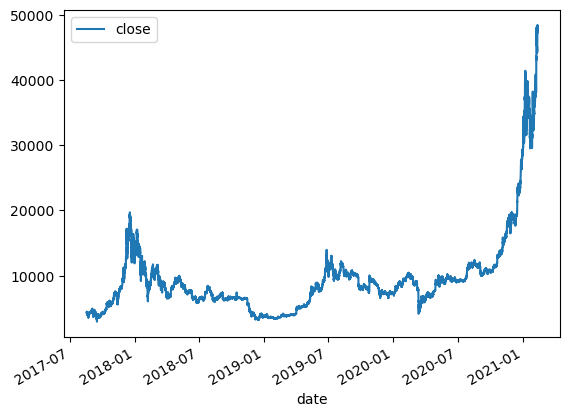

In [35]:
# Visually inspect the price data
df.plot()

In [36]:
# Reset the index so that we recode the columns for Prophet
prophet_df = df.reset_index()

In [37]:
# Label the columns ds and y so that the syntax is recognized by Prophet
prophet_df.columns = ['ds','y']
prophet_df.head()

,ds,y
0,2017-08-17 05:00:00,4315.32
1,2017-08-17 06:00:00,4324.35
2,2017-08-17 07:00:00,4349.99
3,2017-08-17 08:00:00,4360.69
4,2017-08-17 09:00:00,4444.00


In [38]:
# View dataframe shape, and the first and last five rows of the mercado_prophet_df DataFrame
display(prophet_df.head())
display(prophet_df.tail())

,ds,y
0,2017-08-17 05:00:00,4315.32
1,2017-08-17 06:00:00,4324.35
2,2017-08-17 07:00:00,4349.99
3,2017-08-17 08:00:00,4360.69
4,2017-08-17 09:00:00,4444.00


,ds,y
30743,2021-02-12 01:00:00,48477.50
30744,2021-02-12 02:00:00,47935.66
30745,2021-02-12 03:00:00,47587.31
30746,2021-02-12 04:00:00,47271.55
30747,2021-02-12 05:00:00,47398.79


In [39]:
# Sort the DataFrame by `ds` in ascending order
prophet_df = prophet_df.sort_values('ds', ascending=True)

# Display sample data from head and tail
display(prophet_df.head(10))
display(prophet_df.tail(10))

,ds,y
0,2017-08-17 05:00:00,4315.32
1,2017-08-17 06:00:00,4324.35
2,2017-08-17 07:00:00,4349.99
3,2017-08-17 08:00:00,4360.69
4,2017-08-17 09:00:00,4444.00
5,2017-08-17 10:00:00,4460.00
6,2017-08-17 11:00:00,4427.30
7,2017-08-17 12:00:00,4411.00
8,2017-08-17 13:00:00,4459.00
9,2017-08-17 14:00:00,4470.82


,ds,y
30738,2021-02-11 20:00:00,47027.49
30739,2021-02-11 21:00:00,46884.84
30740,2021-02-11 22:00:00,47712.94
30741,2021-02-11 23:00:00,47969.51
30742,2021-02-12 00:00:00,47990.00
30743,2021-02-12 01:00:00,48477.50
30744,2021-02-12 02:00:00,47935.66
30745,2021-02-12 03:00:00,47587.31
30746,2021-02-12 04:00:00,47271.55
30747,2021-02-12 05:00:00,47398.79


<Axes: >

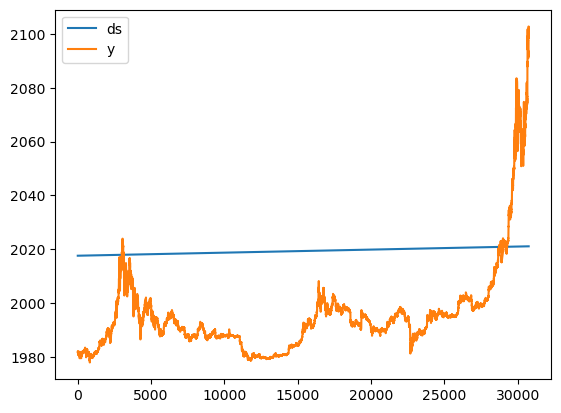

In [40]:
# Plot the data
prophet_df.plot()

In [41]:
# Call the Prophet function, store as an object
m = Prophet()
m

In [42]:
# Fit the Prophet model.
m.fit(prophet_df)

21:22:48 - cmdstanpy - INFO - Chain [1] start processing
21:23:26 - cmdstanpy - INFO - Chain [1] done processing


In [43]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 1000 hours (approx 40 days)
future = m.make_future_dataframe(periods=1000, freq='H')
# View the last five rows of the predictions
display(future.tail(5))

,ds
31482,2021-03-25 17:00:00
31483,2021-03-25 18:00:00
31484,2021-03-25 19:00:00
31485,2021-03-25 20:00:00
31486,2021-03-25 21:00:00


In [44]:
# Make the predictions for the trend data using the future_trends DataFrame
forecast = m.predict(future)

# Display the first five rows of the forecast DataFrame
display(forecast.head(5))

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-08-17 05:00:00,5724.659497,3002.906420,5518.011923,5724.659497,5724.659497,-1493.727947,-1493.727947,-1493.727947,-6.082227,...,10.076289,10.076289,10.076289,-1497.722009,-1497.722009,-1497.722009,0.0,0.0,0.0,4230.931551
1,2017-08-17 06:00:00,5731.697147,3002.853761,5571.700358,5731.697147,5731.697147,-1497.471398,-1497.471398,-1497.471398,-4.046776,...,10.847386,10.847386,10.847386,-1504.272008,-1504.272008,-1504.272008,0.0,0.0,0.0,4234.225749
2,2017-08-17 07:00:00,5738.734797,2909.109856,5603.730364,5738.734797,5738.734797,-1501.807256,-1501.807256,-1501.807256,-2.438278,...,11.461991,11.461991,11.461991,-1510.830968,-1510.830968,-1510.830968,0.0,0.0,0.0,4236.927541
3,2017-08-17 08:00:00,5745.772447,2881.790344,5569.094433,5745.772447,5745.772447,-1508.830100,-1508.830100,-1508.830100,-3.342225,...,11.910970,11.910970,11.910970,-1517.398845,-1517.398845,-1517.398845,0.0,0.0,0.0,4236.942347
4,2017-08-17 09:00:00,5752.810097,2942.071251,5416.604157,5752.810097,5752.810097,-1518.055762,-1518.055762,-1518.055762,-6.267684,...,12.187517,12.187517,12.187517,-1523.975594,-1523.975594,-1523.975594,0.0,0.0,0.0,4234.754335


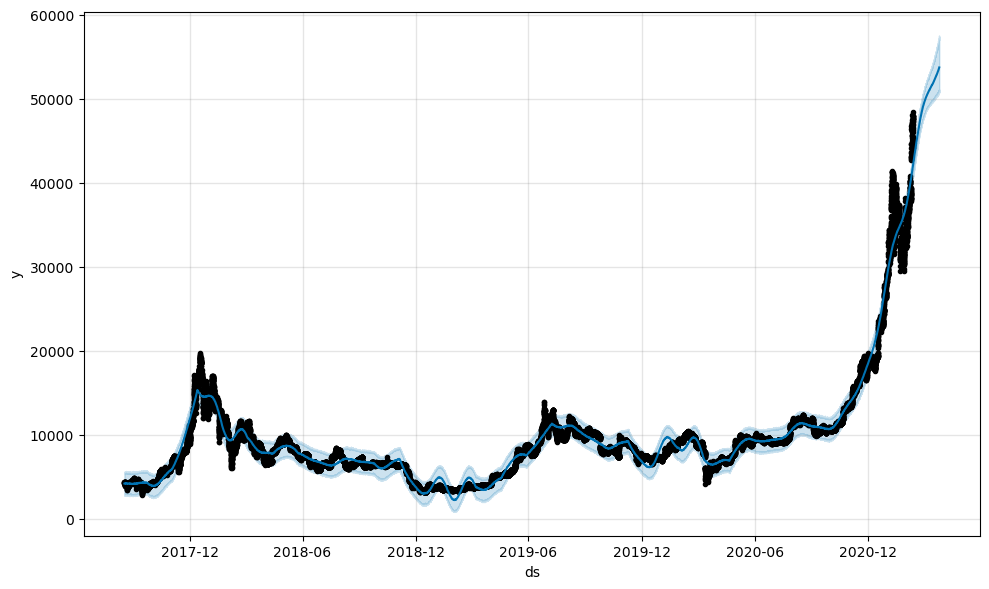

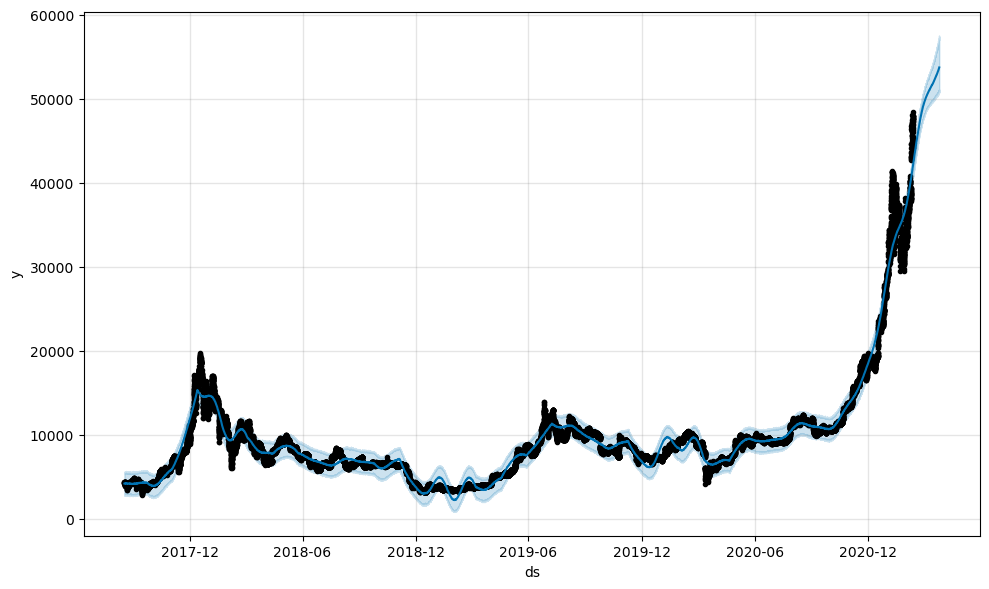

In [45]:
# Plot the Prophet predictions for the Mercado trends data
m.plot(forecast)

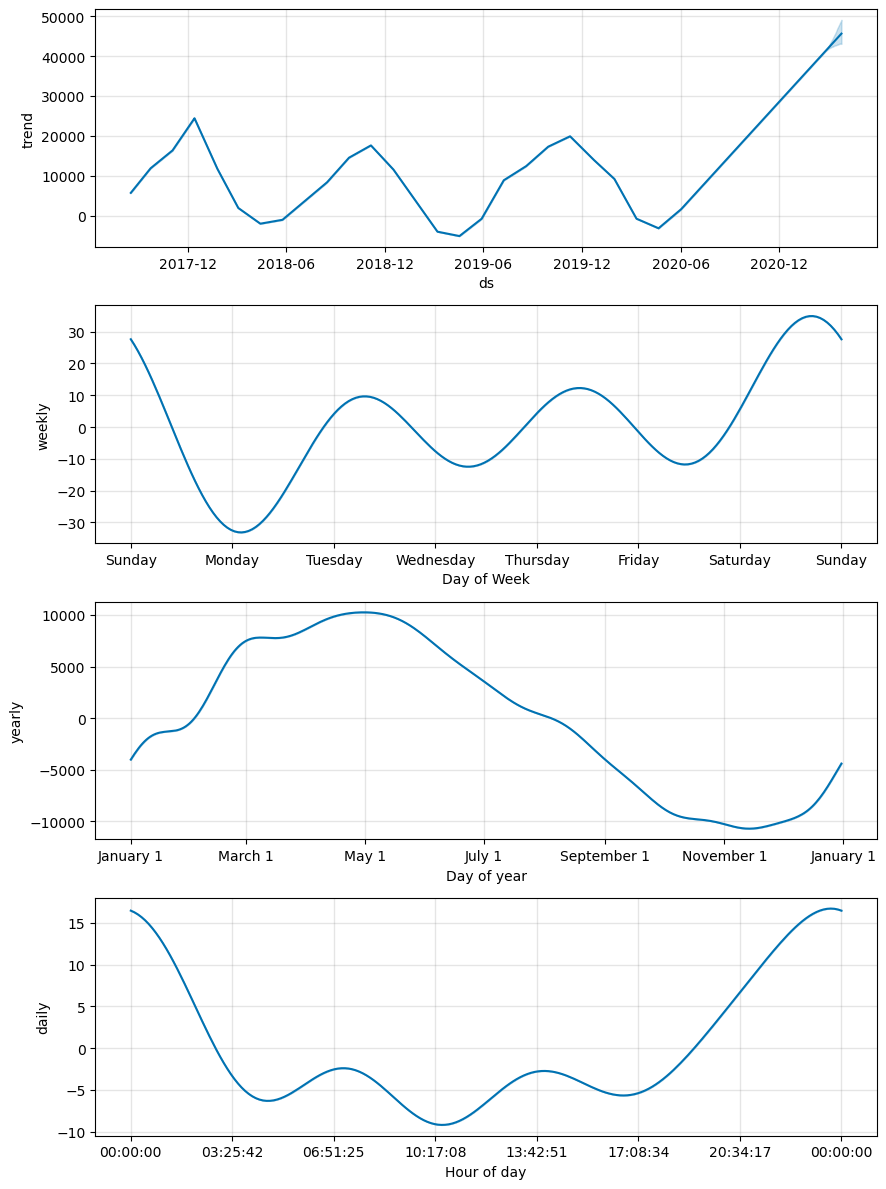

In [46]:
# Use the plot_components function to visualize the forecast results 
fig = m.plot_components(forecast)

In [47]:
# At this point, it's useful to set the `datetime` index of the forecast data.
forecast = forecast.set_index('ds')
forecast.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,,,,
2017-08-17 05:00:00,5724.659497,3002.906420,5518.011923,5724.659497,5724.659497,-1493.727947,-1493.727947,-1493.727947,-6.082227,-6.082227,...,10.076289,10.076289,10.076289,-1497.722009,-1497.722009,-1497.722009,0.0,0.0,0.0,4230.931551
2017-08-17 06:00:00,5731.697147,3002.853761,5571.700358,5731.697147,5731.697147,-1497.471398,-1497.471398,-1497.471398,-4.046776,-4.046776,...,10.847386,10.847386,10.847386,-1504.272008,-1504.272008,-1504.272008,0.0,0.0,0.0,4234.225749
2017-08-17 07:00:00,5738.734797,2909.109856,5603.730364,5738.734797,5738.734797,-1501.807256,-1501.807256,-1501.807256,-2.438278,-2.438278,...,11.461991,11.461991,11.461991,-1510.830968,-1510.830968,-1510.830968,0.0,0.0,0.0,4236.927541
2017-08-17 08:00:00,5745.772447,2881.790344,5569.094433,5745.772447,5745.772447,-1508.830100,-1508.830100,-1508.830100,-3.342225,-3.342225,...,11.910970,11.910970,11.910970,-1517.398845,-1517.398845,-1517.398845,0.0,0.0,0.0,4236.942347
2017-08-17 09:00:00,5752.810097,2942.071251,5416.604157,5752.810097,5752.810097,-1518.055762,-1518.055762,-1518.055762,-6.267684,-6.267684,...,12.187517,12.187517,12.187517,-1523.975594,-1523.975594,-1523.975594,0.0,0.0,0.0,4234.754335


<Axes: xlabel='ds'>

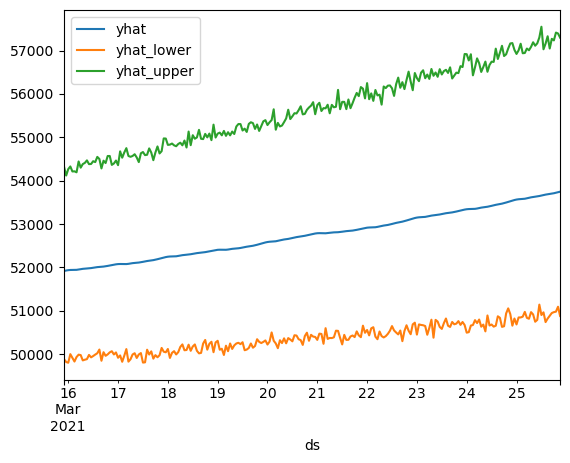

In [48]:
# From the `forecast_trends` DataFrame, plot to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 10 days (24*10 = 240) 
forecast[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-240:,:].plot()

In [49]:
# Create a `forecast_march_2021` Dataframe, which contains just forecasts for that month
# The DataFrame should include the columns yhat_upper, yhat_lower, and yhat
forecast_march_2021 = forecast.loc["2021-03-01":"2021-03-31"][['yhat_upper','yhat_lower','yhat']]
forecast_march_2021.head(5)

# Replace the column names to something less technical sounding
forecast_march_2021 = forecast_march_2021.rename(columns={'yhat_upper':"Best Case",'yhat_lower':'Worst Case','yhat':'Most Likely Case'})

# Review the last five rows of the DataFrame
forecast_march_2021.head(5)

,Best Case,Worst Case,Most Likely Case
ds,,,
2021-03-01 00:00:00,50895.396167,48045.295292,49406.247305
2021-03-01 01:00:00,51009.512689,47843.063099,49412.806946
2021-03-01 02:00:00,51009.174229,48078.104788,49416.360111
2021-03-01 03:00:00,51050.500497,47977.986177,49419.610280
2021-03-01 04:00:00,50848.944237,47854.210848,49425.749862


In [50]:
# Display the average forecasted price for March 2021
forecast_march_2021.mean()

Best Case           53867.898907
Worst Case          49581.791996
Most Likely Case    51574.636943
dtype: float64